Iteration 1, Log-Likelihood: -1218.0904
Iteration 2, Log-Likelihood: -1216.2691
Iteration 3, Log-Likelihood: -1214.4981
Iteration 4, Log-Likelihood: -1212.7032
Iteration 5, Log-Likelihood: -1210.9740
Iteration 6, Log-Likelihood: -1209.5731
Iteration 7, Log-Likelihood: -1208.6747
Iteration 8, Log-Likelihood: -1208.1927
Iteration 9, Log-Likelihood: -1207.9415
Iteration 10, Log-Likelihood: -1207.7929
Iteration 11, Log-Likelihood: -1207.6885
Iteration 12, Log-Likelihood: -1207.6063
Iteration 13, Log-Likelihood: -1207.5382
Iteration 14, Log-Likelihood: -1207.4805
Iteration 15, Log-Likelihood: -1207.4312
Iteration 16, Log-Likelihood: -1207.3886
Iteration 17, Log-Likelihood: -1207.3514
Iteration 18, Log-Likelihood: -1207.3185
Iteration 19, Log-Likelihood: -1207.2891
Iteration 20, Log-Likelihood: -1207.2625
Iteration 21, Log-Likelihood: -1207.2382
Iteration 22, Log-Likelihood: -1207.2159
Iteration 23, Log-Likelihood: -1207.1952
Iteration 24, Log-Likelihood: -1207.1759
Iteration 25, Log-Likelih

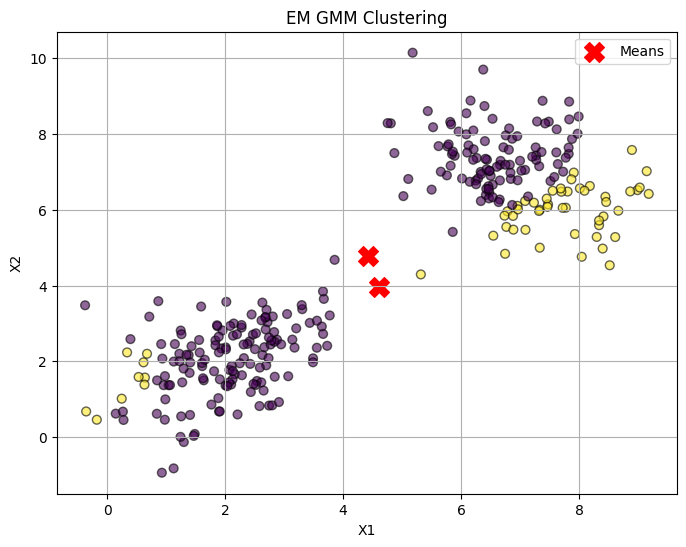

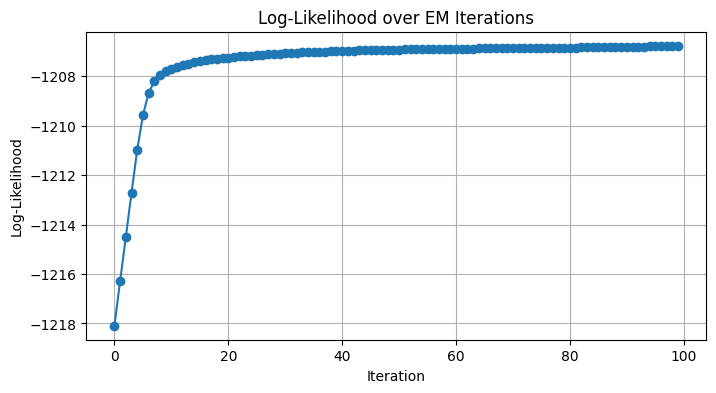

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)

# Generate synthetic 2D data from 2 Gaussian clusters
def generate_data():
    mean1 = [2, 2]
    cov1 = [[1, 0.5], [0.5, 1]]

    mean2 = [7, 7]
    cov2 = [[1, -0.3], [-0.3, 1]]

    data1 = np.random.multivariate_normal(mean1, cov1, 150)
    data2 = np.random.multivariate_normal(mean2, cov2, 150)

    return np.vstack((data1, data2))

# Initialize parameters for GMM
def initialize_parameters(X, k):
    n, d = X.shape
    weights = np.ones(k) / k
    means = X[np.random.choice(n, k, replace=False)]
    covariances = [np.cov(X.T) for _ in range(k)]
    return weights, means, covariances

# E-step: compute responsibilities
def e_step(X, weights, means, covariances):
    n = X.shape[0]
    k = len(weights)
    resp = np.zeros((n, k))

    for i in range(k):
        resp[:, i] = weights[i] * multivariate_normal.pdf(X, means[i], covariances[i])

    resp_sum = resp.sum(axis=1)[:, np.newaxis]
    responsibilities = resp / resp_sum
    return responsibilities

# M-step: update parameters
def m_step(X, responsibilities):
    n, d = X.shape
    k = responsibilities.shape[1]
    Nk = responsibilities.sum(axis=0)

    weights = Nk / n
    means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
    covariances = []

    for i in range(k):
        diff = X - means[i]
        weighted_cov = np.dot(responsibilities[:, i] * diff.T, diff) / Nk[i]
        covariances.append(weighted_cov)

    return weights, means, covariances

# Compute log-likelihood
def compute_log_likelihood(X, weights, means, covariances):
    n = X.shape[0]
    k = len(weights)
    likelihood = np.zeros((n, k))

    for i in range(k):
        likelihood[:, i] = weights[i] * multivariate_normal.pdf(X, means[i], covariances[i])

    total_likelihood = np.log(likelihood.sum(axis=1)).sum()
    return total_likelihood

# EM algorithm loop
def expectation_maximization(X, k=2, max_iter=100, tol=1e-4):
    weights, means, covariances = initialize_parameters(X, k)
    log_likelihoods = []

    for iteration in range(max_iter):
        responsibilities = e_step(X, weights, means, covariances)
        weights, means, covariances = m_step(X, responsibilities)
        log_likelihood = compute_log_likelihood(X, weights, means, covariances)
        log_likelihoods.append(log_likelihood)

        print(f"Iteration {iteration+1}, Log-Likelihood: {log_likelihood:.4f}")

        if iteration > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print("Convergence reached.")
            break

    return weights, means, covariances, responsibilities, log_likelihoods

# Plotting the results
def plot_results(X, means, responsibilities, title="EM GMM Clustering"):
    cluster_labels = np.argmax(responsibilities, axis=1)
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=40, alpha=0.6, edgecolor='k')
    plt.scatter(means[:, 0], means[:, 1], c='red', s=200, marker='X', label='Means')
    plt.legend()
    plt.grid(True)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

# Plot log-likelihood progression
def plot_log_likelihood(log_likelihoods):
    plt.figure(figsize=(8, 4))
    plt.plot(log_likelihoods, marker='o')
    plt.title("Log-Likelihood over EM Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.grid(True)
    plt.show()

# Run everything
X = generate_data()
weights, means, covariances, responsibilities, log_likelihoods = expectation_maximization(X, k=2)
plot_results(X, means, responsibilities)
plot_log_likelihood(log_likelihoods)